In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from math import pi
from math import sin
from math import cos
from PlotMaker import PlotMaker
from Network import RingNetwork, SimpleContextNetwork, MixedNetwork
from GridSearch import GridSearch
from InputGenerator import InputGenerator

In [2]:
plotmaker = PlotMaker()

## Mixed Network

In [8]:
#### N = 100
N = 100
N_c = 2
C = 1
N_cr = 20
J_cr = 0.01
K_inhib = 0.01
target_indices = np.array([N//2, 0])
network = MixedNetwork(N, N_c, C, K_inhib, N_cr, J_cr, target_indices)
inputgen = InputGenerator()
input_ext, input_c, alphas = inputgen.get_input2(1250, N_c)
m, f, dmdt = network.simulate(input_ext, input_c, alphas)

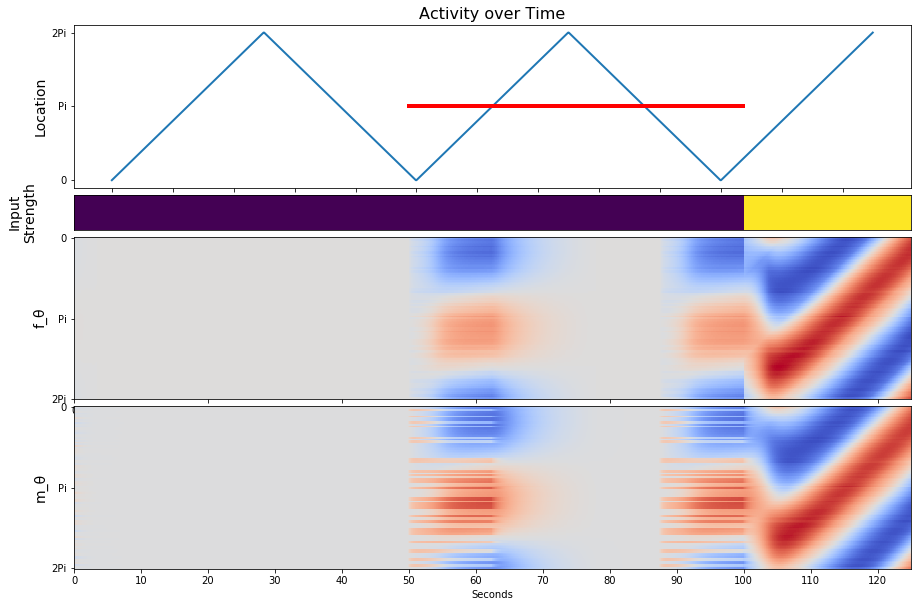

In [9]:
plotmaker.plot_main(
    input_ext, alphas, f, input_c, target_indices/N, m
    )

In [11]:
def _make_ring(network):
    for context in range(2):
        plt.figure(figsize=(3,3))
        target_index = network.target_indices[context]
        seed_units = network.ring_indices[context,:]
        x = []
        y = []
        for seed_unit in seed_units:
            seed_angle = (seed_unit/network.N)*(2*pi)
            x.append(cos(seed_angle))
            y.append(sin(seed_angle))
        target_angle = (target_index/network.N)*(2*pi)
        plt.scatter(x, y, color="blue")
        plt.scatter(
            cos(target_angle), sin(target_angle), color="red"
            )
        plt.xticks([])
        plt.yticks([])
        plt.xlim([-1.1, 1.1])
        plt.ylim([-1.1, 1.1])

In [12]:
origJ = network.J

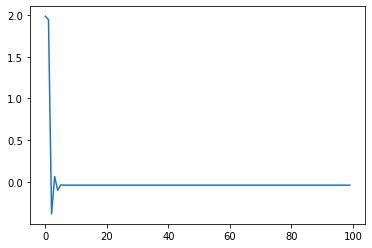

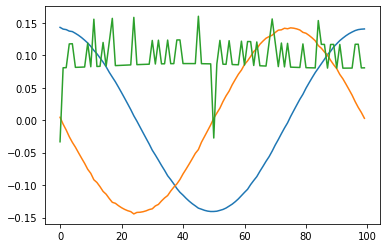

In [25]:
with open('network.p', 'rb') as f:
    network = pickle.load(f)
w, v = np.linalg.eig(network.J)
plt.figure()
plt.plot(w)
plt.figure()
for i in range(3):
    plt.plot(v[:,i])

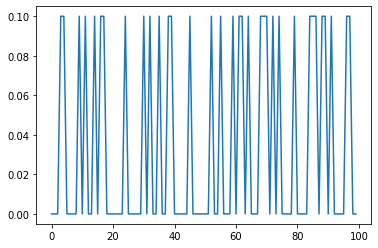

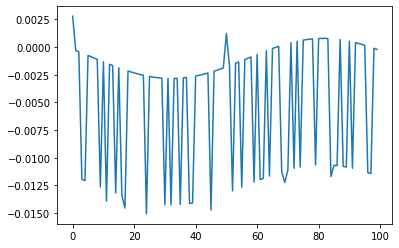

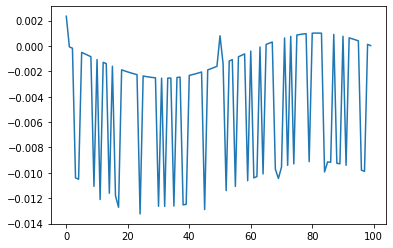

In [26]:
x = np.zeros(100)

# Activate context to ring
x[network.ring_indices.flatten()] = 0.1
# Activate the rest
step1 = 0.1*(-x + network.J@x)

# Activate context to ring
x[network.ring_indices.flatten()] = 0.1
# Activate the rest
step1 = 0.1*(-x + network.J@x)

plt.figure()
plt.plot(x)
plt.figure()
step1 = 0.1*(-x + network.J@x)
plt.plot(step1)
plt.figure()
plt.plot(step1 + 0.1*(-step1 + network.J@step1))

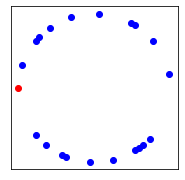

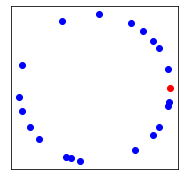

In [27]:
_make_ring(network)

In [28]:
inhib = np.zeros(N)
for idx, cr_con in enumerate(network.ring_indices):
    targ = network.target_indices[idx]
    other_conn = [c for c in network.ring_indices.flatten() if c not in cr_con]
    for cr_c in cr_con:
        inhib[other_conn] -= network.J_cr/2.

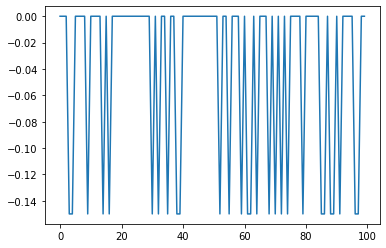

In [29]:
plt.plot(inhib)

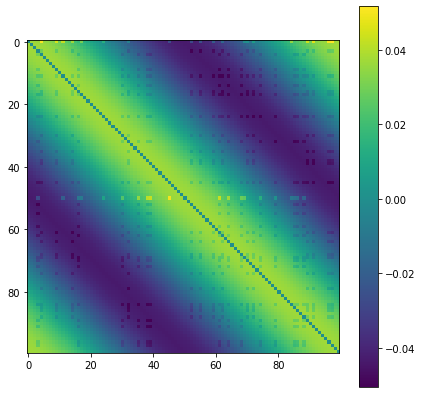

In [30]:
plt.figure(figsize=(7,7))
plt.imshow(network.J)
plt.colorbar()